In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import random
import pandas as pd

import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

In [3]:
# Leemos el dataframe ya procesado y con la información limpia que contiene autores y tweets. 
df = pd.read_csv('twitter/CleanAllTweets.csv')

In [9]:
df = df[["tweets"]]
df.dropna(inplace=True)

In [10]:
# Función de preprocesamiento:
def text_preprocessing(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
    return result

In [11]:
print('Original text:\n{}\n\n'.format(df['tweets'][0]))
print('Processed text:\n{}'.format(text_preprocessing(df['tweets'][0])))

Original text:
statistic sql kdn


Processed text:
['statistic']


In [21]:
# Implementamosla función text_preprocessing()
processed_texts = []
for text in df['tweets']:
    processed_texts.append(text_preprocessing(text))

## Diccionario id - palabra

In [22]:
dictionary = Dictionary(processed_texts)

In [23]:
type(dictionary)

gensim.corpora.dictionary.Dictionary

In [24]:
list(dictionary.items())

[(0, 'statistic'),
 (1, 'dawkin'),
 (2, 'fpeace'),
 (3, 'hasan'),
 (4, 'india'),
 (5, 'israel'),
 (6, 'jazeera'),
 (7, 'lover'),
 (8, 'mehdi'),
 (9, 'record'),
 (10, 'richard'),
 (11, 'tech'),
 (12, 'believe'),
 (13, 'case'),
 (14, 'clear'),
 (15, 'convincing'),
 (16, 'drunk'),
 (17, 'foueen'),
 (18, 'hypothetical'),
 (19, 'memory'),
 (20, 'rape'),
 (21, 'tweet'),
 (22, 'unlike'),
 (23, 'business'),
 (24, 'calculate'),
 (25, 'fallback'),
 (26, 'positive'),
 (27, 'risk'),
 (28, 'successful'),
 (29, 'sure'),
 (30, 'want'),
 (31, 'explosive'),
 (32, 'great'),
 (33, 'hole'),
 (34, 'live'),
 (35, 'month'),
 (36, 'myth'),
 (37, 'mythbuster'),
 (38, 'tonight'),
 (39, 'city'),
 (40, 'diverse'),
 (41, 'segregate'),
 (42, 'addition'),
 (43, 'building'),
 (44, 'chicago'),
 (45, 'enjoyed'),
 (46, 'greatly'),
 (47, 'like'),
 (48, 'look'),
 (49, 'realmattshroyer'),
 (50, 'stay'),
 (51, 'trump'),
 (52, 'creator'),
 (53, 'fantastic'),
 (54, 'inspect'),
 (55, 'listen'),
 (56, 'propey'),
 (57, 'rush'),


In [25]:
len(dictionary)

37085

In [26]:
corpus = [dictionary.doc2bow(doc) for doc in processed_texts]

In [49]:
# Entrenamiento del modelo (LDA)
num_topics = 6

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    iterations=5,
    passes=10,
    alpha='auto'
)

In [50]:
lda_model.show_topics()

[(0,
  '0.040*"nasa" + 0.037*"space" + 0.024*"today" + 0.019*"year" + 0.018*"love" + 0.017*"launch" + 0.017*"station" + 0.012*"image" + 0.010*"shuttle" + 0.009*"look"'),
 (1,
  '0.040*"thousand" + 0.034*"trump" + 0.029*"good" + 0.026*"watch" + 0.021*"seven" + 0.017*"great" + 0.017*"live" + 0.016*"thiy" + 0.013*"night" + 0.011*"look"'),
 (2,
  '0.023*"obama" + 0.023*"president" + 0.015*"realdonaldtrump" + 0.013*"need" + 0.013*"thank" + 0.012*"people" + 0.011*"want" + 0.011*"work" + 0.011*"america" + 0.010*"american"'),
 (3,
  '0.102*"kdnugget" + 0.074*"datum" + 0.060*"science" + 0.041*"data" + 0.033*"html" + 0.032*"machine" + 0.031*"learn" + 0.024*"learning" + 0.021*"analytic" + 0.018*"scientist"'),
 (4,
  '0.023*"sixteen" + 0.018*"book" + 0.013*"pluto" + 0.012*"post" + 0.010*"rise" + 0.009*"course" + 0.009*"online" + 0.009*"baby" + 0.008*"july" + 0.008*"network"'),
 (5,
  '0.035*"time" + 0.027*"like" + 0.026*"know" + 0.021*"think" + 0.017*"tonight" + 0.017*"right" + 0.014*"thing" + 0.0

In [51]:
word_dict = {};
for i in range(num_topics):
    words = lda_model.show_topic(i, topn = 20)
    word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

Topic #01      Topic #02        Topic #03  Topic #04       Topic #05  \
0        nasa       thousand            obama   kdnugget         sixteen   
1       space          trump        president      datum            book   
2       today           good  realdonaldtrump    science           pluto   
3        year          watch             need       data            post   
4        love          seven            thank       html            rise   
5      launch          great           people    machine          course   
6     station           live             want      learn          online   
7       image           thiy             work   learning            baby   
8     shuttle          night          america   analytic            july   
9        look           look         american  scientist         network   
10       crew        million            woman       deep  nasanewhorizon   
11       week          tweet             vote     python           movie   
12    mission          video          country     mining           super   
13      check           zero            great    explain           issue   
14       star         donald           debate      fresh           model   
15       view           news          hillary       step          social   
16       moon        seventy             help   software         perfect   
17  astronaut  richarddawkin           change  algorithm            wind   
18  satellite           team            happy    project          neural   
19     happen         ninety            state   engineer         mistake   

        Topic #06  
0            time  
1            like  
2            know  
3           think  
4         tonight  
5           right  
6           thing  
7            life  
8            long  
9            miss  
10           read  
11     mythbuster  
12         chance  
13           true  
14           mean  
15           wait  
16        twitter  
17  kimkardashian  
18         little  
19     kardashian

In [52]:
# Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # Medida de qué tan bueno es el modelo. Cuanto más bajo, mejor

# Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.261486147820884

Coherence Score:  0.4061124166585643


In [53]:
# Visualizar los topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.239798  0.151208       1        1  27.169999
0      0.152433 -0.325141       2        1  20.283301
1      0.145626  0.051801       3        1  18.921721
5     -0.267432 -0.111973       4        1  15.035391
3     -0.102999  0.232969       5        1  11.320951
4     -0.167427  0.001136       6        1   7.268638, topic_info=            Term         Freq        Total Category  logprob  loglift
143     kdnugget  7789.000000  7789.000000  Default  30.0000  30.0000
141        datum  5691.000000  5691.000000  Default  29.0000  29.0000
205      science  4564.000000  4564.000000  Default  28.0000  28.0000
65          nasa  5519.000000  5519.000000  Default  27.0000  27.0000
389     thousand  5119.000000  5119.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
4704      impact   230.190808   231.014021   Topic6  -5.3656   2.6180
1134     include   226.833314   227.656456   Topic6  -5.3803   2.6180
1973  atmosphere   226.510965   227.334409   Topic6  -5.3817   2.6180
840         adam   221.168976   221.989389   Topic6  -5.4056   2.6179
1263  understand   263.115500   394.783851   Topic6  -5.2319   2.2159

[233 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
840       6  0.995543       adam
139       5  0.998868  algorithm
414       2  0.012734    amazing
414       3  0.985114    amazing
414       4  0.001158    amazing
...     ...       ...        ...
329       1  0.999436       work
1356      4  0.998002      wrong
221       1  0.274151       year
221       2  0.725893       year
190       3  0.999634       zero

[222 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 6, 4, 5])

In [62]:
# Análisis de los resultados

# Topic 1 --> Engloba temas, palabras y personas de la política americana.
# Topic 2 --> Engloba palabras que tienen que ver con el espacio.
# Topic 3 --> Engloba temas de magazin diría yo.
# Topic 4 --> Engloba tweets en los que parecen que se expresan opiniones.
# Topic 5 --> Engloba temas que tienen que ver con datos, machine learning, análisis y tecnología.
# Topic 6 --> Engloba temas de network pero de una forma muy ambigua.

In [55]:
pyLDAvis.save_html(vis, 'results/topics_vis_0.html')

In [56]:
# Función para calcular el número óptimo de tokens
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        
        # Build LDA model
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics)
        
        # Create a list of LDA models
        model_list.append(model)
        
        # Compute the Coherence for each model
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [57]:
start_ = 9
end_ = 14
step_ = 1

In [58]:
model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary,
    corpus=corpus,
    texts=processed_texts,
    start=start_,
    limit=end_,
    step=step_
)

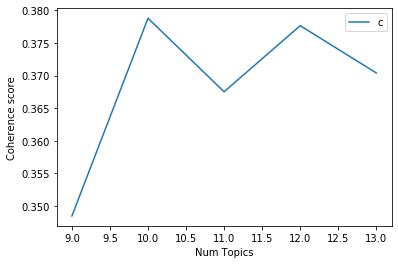

In [59]:
# Según esta gráfica, el número óptimo de topics serían 10.
x = range(start_, end_, step_)
plt.plot(x, coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence score')
plt.legend(('coherence_values'), loc='best')
plt.show()